# Librería SYMPY

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Sympy_logo.svg/1200px-Sympy_logo.svg.png" width="200px"/>

https://www.sympy.org/en/index.html

Sympy es una librería para matemáticas simbólicas y aunque esa parte de *nuestra vida* la hemos superado, su uso hace más **eficiente y preciso** el cáculo.

Veamos en que consiste y como podemos integrarla en nuestros proyectos:


In [34]:
import sympy
import sympy as sp
from sympy import *

print(sympy.pi) # pi
print(float(sp.pi))
print(int(pi))

pi
3.141592653589793
3


In [42]:
x,y = symbols('x y')
expr = (pi*x)/y
print(expr)
print("--"*10)
pprint(expr) 
# sympy.init_printing(use_unicode=True) #en IDEs como Spyder

pi*x/y
--------------------
π⋅x
───
 y 


##  Tipos de elementos
### Variables

In [87]:
x, y = symbols('x y')
x, y = sp.var("x y")  # es lo mismo que symbols
a,b,c,d = sp.symbols("a:d") # e incluso podemos tener rangos de variables
expr = x+3*sqrt(x*y+y+1)
pprint(expr)
print("--"*10)
print(latex(expr)) # lo podemos llevar a Latex 

        _____________
x + 3⋅╲╱ x⋅y + y + 1 
--------------------
x + 3 \sqrt{x y + y + 1}


Y esa expresión en Latex funciona!
$$x + 3 \sqrt{x y + y + 1}$$

In [126]:
srepr(expr) # La composición jerarquíca/dependencia entre variables

"Add(Symbol('x'), Mul(Integer(3), Pow(Add(Mul(Symbol('x'), Symbol('y')), Symbol('y'), Integer(1)), Rational(1, 2))))"

### Constantes

In [37]:
pprint(pi) #pi
print(float(sympy.pi)) # No es lo correcto
print(sympy.pi.evalf(30)) #Correcto

pprint(sympy.I) # número imaginario
pprint(sympy.oo)# Infinito
pprint(sympy.E) # e = exp(1)
print(E.evalf(10))

π
3.141592653589793
3.14159265358979323846264338328
ⅈ
∞
ℯ
2.718281828


### Número racionales y precisión
¿Es importante dicha precisión?

In [56]:
# La diferencia entre otros tipos de representaciones 

import numpy as np
q = sp.Rational(3,7)
pprint(q) # 

print(3/7)
print(np.longfloat(3/7))
print("%.50f"%np.longfloat(3/7))
print(q.evalf(50))
# ¿Cuál es el correcto?

3/7
0.42857142857142855
0.42857142857142854764
0.42857142857142854763807804374664556235074996948242
0.42857142857142857142857142857142857142857142857143


In [76]:
# E internamente qué ocurre cuando operamos... 
import math

# CASO A
print(math.sin(math.pi)) # no no no... es 0!
print(sp.sin(sp.pi)) #ok!

print("--"*10)

# CASO B
print("%.50f"% (np.longfloat(3/7)*math.pi)) # no no no... es 0!
expr = Rational(3,7)*sp.pi
pprint(expr)
print(expr.evalf(50))

1.2246467991473532e-16
0
--------------------
1.34639685153848276399912720080465078353881835937500
3⋅π
───
 7 
1.3463968515384828164839900214055012360845011711608


In [82]:
# Precisión y valor exacto
a = math.sin(math.pi/4)
print(a)
print("-"*10)
b = sin(pi/4) 
print(b)

0.7071067811865475
----------
sqrt(2)/2


### a nivel de rendimiento tiene un mayor coste el cálculo simbólico... tradeoff

In [93]:
%%time
a = math.sin(math.pi/4)
print("%.50f"%a)

0.70710678118654746171500846685376018285751342773438
CPU times: user 93 µs, sys: 15 µs, total: 108 µs
Wall time: 113 µs


In [95]:
%%time
b = sin(pi/4) 
print(b.evalf(50))

0.70710678118654752440084436210484903928483593768847
CPU times: user 414 µs, sys: 67 µs, total: 481 µs
Wall time: 457 µs


### Es una cuestión de precisión!

## Motivational examples
- Rocklin, M. *Symbolic Statistics with Sympy*     https://www.researchgate.net/publication/260585491_Symbolic_Statistics_with_SymPy
        

In [111]:
from IPython.display import Audio,Image, YouTubeVideo
YouTubeVideo(id='krzC92hZ8pA',width=600,height=300)

In [129]:
# En el artículo tenéis un código 
# Inicialización númerica
x0  = 0
y0 = 0
yf = -30 # target is 30 meters below g = -10 # gravitational constant
v = 30 # m/s
g = -10
theta = pi/4

In [41]:
# Código del artículo
# Inicialización simbólica
x0 = Symbol("x_0")
y0 = Symbol("y_0")
yf = Symbol("y_f")
g = Symbol("g1")
v = Symbol("v")
theta = Symbol("theta")

In [42]:
# Código del artículo
# Computo
t = Symbol("t")# En función de time
x = x0 + v*cos(theta)*t
y = y0 + v*sin(theta)*t + g*t**2
impact_time = sympify(y - yf, t)
xf = x0 + v*cos(theta)*impact_time
xf.evalf() 

v*(g1*t**2 + t*v*sin(theta) + y_0 - y_f)*cos(theta) + x_0

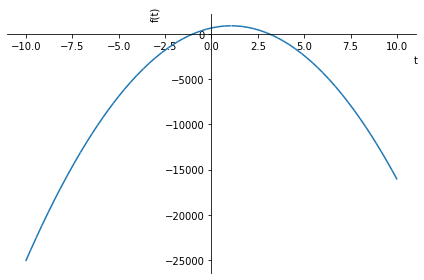

In [47]:
xf = xf.subs({x0:0, y0:0, yf:-30, v:30, g:-10, theta: pi/4})
sp.plot(xf,(t,-10,10))

## Tipos de variables
- Variables
- Constantes
- Racionales

### Funciones Trigonométricas
https://docs.sympy.org/latest/modules/functions/elementary.html#sympy-functions-elementary-trigonometric

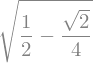

In [137]:
sin(pi/8)

In [143]:
# unnormalized sinc function
sinc(oo)

### Funciones misceláneas 
https://docs.sympy.org/latest/modules/functions/elementary.html#sympy-functions-elementary-miscellaneous

In [145]:
Max(9,oo)

In [152]:
Min(pi,E)

In [153]:
root(pi,3)

In [159]:
sqrt(pi**2)

### Funciones con variables !

In [212]:
x = symbols("x")
expr = cos(pi*x**2)
pprint(expr)

## sustituciones
expr.subs(x,3)

   ⎛   2⎞
cos⎝π⋅x ⎠


### Funciones lambda

In [166]:
f = Lambda(x,sin(x)*x**3)
pprint(f)

     3       
x ↦ x ⋅sin(x)


In [167]:
f(8)

In [168]:
f(10).evalf()

## Simplificación, optimización y expansión de expresiones

In [178]:
x = symbols("x")
expr = 1+(2*x+3)*x**2+4*x**2
expr

In [179]:
simplify(expr) # Simplificación

In [180]:
expr = 2*cos(x)*sin(x)*tan(x)
expr

In [182]:
simplify(expr) # Simplificación para optimizar

In [183]:
expr= (x+1)*(x+2)
expr

In [186]:
expand(expr) # Expansión 

In [188]:
# Podemos expandir/agrupar en función de una variable

In [191]:
x,y,z = symbols("x y z")
expr = x+x*y+z*y+z
expr

In [192]:
expr.collect(x)

In [193]:
expr.collect(y)

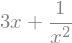

In [196]:
expr = 1/x**2+3*x
expr

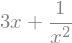

In [197]:
apart(expr,x)

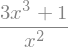

In [198]:
together(expr)

      1
3⋅x + ─
      x


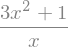

In [201]:
expr = x/x**2+3*x
pprint(expr)
cancel(x/x**2+3*x)

## Evaluación númerica

In [203]:
pi.evalf(10)

In [204]:
N(pi)

In [220]:
expr = 2*cos(x)*sin(x)*tan(x)
expr

In [217]:
values = [expr.subs(x,value) for value in range(10)]
print(values)

[0, 2*sin(1)*cos(1)*tan(1), 2*sin(2)*cos(2)*tan(2), 2*sin(3)*cos(3)*tan(3), 2*sin(4)*cos(4)*tan(4), 2*sin(5)*cos(5)*tan(5), 2*sin(6)*cos(6)*tan(6), 2*sin(7)*cos(7)*tan(7), 2*sin(8)*cos(8)*tan(8), 2*sin(9)*cos(9)*tan(9)]


In [222]:
values = [expr.subs(x,value).evalf(4) for value in range(10)]
print(values)

[0, 1.416, 1.654, 0.03983, 1.146, 1.839, 0.1561, 0.8633, 1.958, 0.3397]


In [223]:
## Podemos transformar expresiones en funciones que computen numericamente
# https://docs.sympy.org/latest/modules/utilities/lambdify.html
    
expr_f = lambdify(x,expr)
values = [expr_f(value) for value in range(10)]
print(values)

[0.0, 1.4161468365471424, 1.653643620863612, 0.03982971334963398, 1.1455000338086134, 1.8390715290764523, 0.1561460412675079, 0.8632627817921664, 1.9576594803233844, 0.3396832917559199]


## Cálculo operacional
### Derivadas

In [228]:
expr= (x+1)*(x+2)
expr

In [229]:
diff(expr)

In [226]:
expr = diff(sin(x),x)
expr

In [227]:
expr = diff(sin(x),x,x)
expr

### Integrales

In [230]:
expr= (x+1)*(x+2)
expr

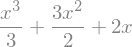

In [231]:
integrate(expr)

In [232]:
expr = integrate(sin(x),x)
expr

In [233]:
expr = integrate(sin(x),(x,-oo,4))
expr

In [234]:
expr = (x+y)
integrate(expr,(x,0,4),(y,0,1))

### Límites

In [236]:
expr = sin(x)/x
pprint(expr)
limit(expr,x,0) 

sin(x)
──────
  x   


In [237]:
expr = x
limit(expr,x,oo) 

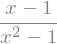

In [240]:
expr = (x-1)/(x**2-1)
expr

In [241]:
limit(expr,x,0) 

In [242]:
# https://www.math-exercises.com/limits-derivatives-integrals/limit-of-a-function

### Sumatorios y productos

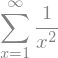

In [246]:
expr = Sum(1/x**2,(x,1,oo))
expr

In [247]:
expr.doit() # Evaluación

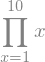

In [248]:
expr = Product(x,(x,1,10))
expr

In [249]:
expr.doit() # Evaluación

## Aleatoriedad y distribuciones
https://docs.sympy.org/latest/modules/stats.html

In [254]:
import sympy.stats as st
Z = st.Normal('Z', 0, 1) # Distribución normal, mean 0, std 1

In [255]:
st.P(Z<0.1) # Probabilidad 

In [256]:
Z2 = st.Normal('Z2', 1, 2)

In [257]:
st.E(Z+Z2) # Esperanza

In [258]:
st.variance(Z2) #Varianza

In [270]:
Y = st.DiscreteUniform('Y', list(range(5)))
st.density(Y)

In [268]:
st.P(Y<1)

## Ploting 

In [303]:
x = Symbol("x")
expr= (x+1)*(x+2)
expr

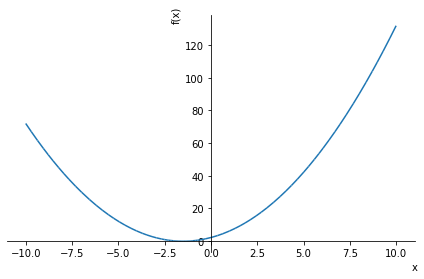

In [305]:
sp.plot(expr,(x,-10,10))

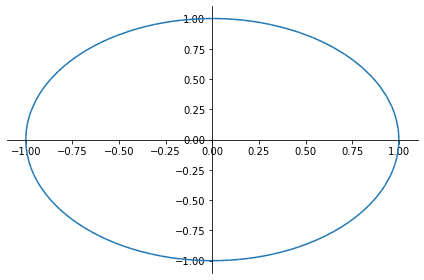

In [299]:
from sympy.plotting import plot_parametric
x = cos(t)
y = sin(t)
plot_parametric(x, y, (t, 0, 2*pi))

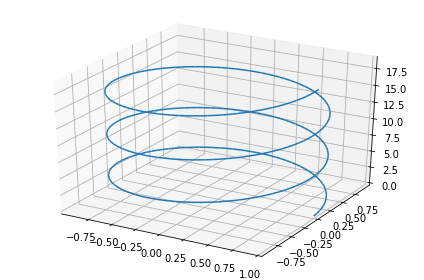

In [300]:
from sympy.plotting import plot3d_parametric_line
x = cos(t)
y = sin(t)
z = t

plot3d_parametric_line(x, y, z, (t, 0, 6*math.pi))

# <span style="color:blue">Actividad</span>

## A. Mice Problem

Intenta en la celda siguiente obtener los valores de coordenadas de la serie del *Mice problem* definido en el siguiente enlace:
https://mathworld.wolfram.com/MiceProblem.html

```python
[0.5, 0.6666666666666667, 1.0, 1.447213595499958, 2.0000000000000004, 2.655970555211364, 3.414213562373096, 4.274316085206517]
````


## B. Intersection Problem

Calcula el punto de intersección de ambas funciones
Nota: Sympy incluye geometría, pero no es necesario para este problema.

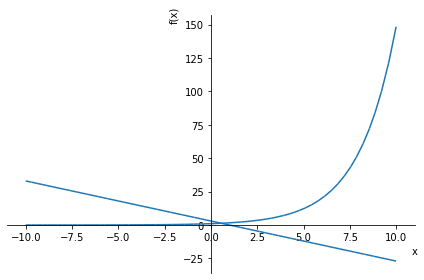

[1 - 2*LambertW(exp(1/2)/6)]


In [11]:
import sympy as sp

x = sp.symbols('x')

f_x = sp.E ** (x / 2)
g_x = 3 - 3 * x

p1 = sp.plot(f_x,show=False)
p2 = sp.plot(g_x,show=False)

p1.append(p2[0])
p1.show()

#Intersection point?

## C. Pursuit Curve
Vamos a calcular la curva de *persecución* entre dos objetos y a representarla como se adjunta a continuación.

https://www.cfm.brown.edu/people/dobrush/am33/python/?/p2/pursuit.html

**Nota**: solo C y f(y)

<img src="images/resultado_sympy_C.png" width="300px"/>

In [ ]:
import sympy as sp

x0, n, x= sp.symbols("x0 n x")

#TODO